# Métodos de Ensamble Aplicados a Clasificación

📌 Probar diferentes estimadores y llegar a una sola conclusión a través de un consenso. <br>

En lugar de depender de un solo modelo para hacer una predicción, se combinan las predicciones de varios modelos para obtener un resultado final más preciso y robusto.

**Características de los métodos de ensamble**

1. Combinar diferentes métodos (algoritmos/modelos) de ML con diferentes configuraciones y aplicar un método para lograr un consenso.
2. Probar diferentes modelos con diferentes parámetros.

> Analogía  “*sabiduría de la multitud*”. Si le preguntas a un solo experto una pregunta difícil, puedes obtener una buena respuesta. Pero si le preguntas una pregunta difícil a un comité de diez expertos y combinas sus opiniones, es mucho más probable que la respuesta final sea excelente y menos sensible a los sesgos o errores de un solo individuo.


> 💡 En clasificación: <br>
	Expertos = Modelos individuales.

</aside>

**🎯 Objetivo principal de los ensambles:**

- **Reducir la varianza** (overfitting): Ayuda a generalizar mejor.
- **Reducir el sesgo** (bias): Ayuda a que el modelo no sea demasiado simple.

**Estrategias**

1. **Bagging** 🎒 (Bootstrap AGGregation): Utiliza a varios “expertos” para evaluar los diferentes modelos, cada uno califica en paralelo, luego se intenta lograr un consenso,  mediante una formula: conteo de votos ó un promedio. <br>
🎯 **Objetivo**: Reducir la varianza y evitar el overfitting 
    1. Crea particiones aleatorias (uniformes y con reemplazo) del dataset original.
    1. Se construyen modelos para cada una de las particiones.<br>
    📢 Pueden ser el mismo modelo o bien modelos diferentes.
    1. La respuesta final es la combinación entre todas las respuestas individuales.

2. **Boosting** 🚀 impulsar / propulsar: Se centra en mejorar el rendimiento mediante aprendizaje en secuencia, cada modelo intenta corregir el los errores del modelo anterior. <br>
🎯 Objetivo: Reducir el sesgo y construir un modelo fuerte de manera secuencial.
    1. Entrenamiento secuencial.
    2. Busca fortalecer gradualmente un modelo utilizando el error residual del modelo anterior.
    3. El resultado final se consigue por consenso entre todos los modelos.


**Métodos de Bagging:**
- Random Forest → Utiliza varios árboles de decisión
- Voting Classifier / Regressor

**Métodos de Boosting:**
- AdaBoost
- Gradient Tree Boosting
- XGBoost (librería externa a scikit-learn).

## Implementación con Scikit-Learn

<div class="alert alert-info", role="alert">
    <h5>⚠️</h5>
    <p>
      El ejemplo desglosado a continuación sigue paso a paso la implementación que se realizó en el curso, solo con unos detalles adicionales. <br>
			Especificamente en la clase <a href="https://platzi.com/cursos/scikitlearn/preparacion-de-datos-para-implementar-metodos-de-e/"> 
				Implementación de Baggin Classifier</a>
				<br>
    </p>
</div>

Librerías:

In [1]:
import pandas as pd

# Módelo
from sklearn.neighbors import KNeighborsClassifier
# Método de ensamble
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Dividir el dataset en entrenamiento y pruebas
from sklearn.model_selection import train_test_split
# Metricas
from sklearn.metrics import accuracy_score

In [2]:
%run 0.0-ml_professional-setup.ipynb

Carga del dataset Heart Disease:

In [3]:
file_path = path.data_raw_dir("heart.csv")

df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Separamos el dataframe en features de entrenamiento y target:

In [4]:
X = df.drop(columns=["target"])
y = df["target"]

print(f"Features' shape: {X.shape}")
print(f"Tartge's shape: {y.shape}")

Features' shape: (1025, 13)
Tartge's shape: (1025,)


División de datos en entrenamiento y pruebas:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=42)

Entrenamiento del modelo K-Neighbors:


📌 **NOTA**: K-Neighbors es un clasificador poco robusto, por lo que utilizarlo para ejemplificar las capacidades de Bagging con clasificadores "débiles" se presta para este ejercicio, donde comparamos la precisión en las predicciones entre estos modelos.

In [6]:
kn_class = KNeighborsClassifier().fit(X_train, y_train)
kn_pred = kn_class.predict(X_test)
kn_accuracy =  accuracy_score(kn_pred, y_test)

Entrenamiento de BagginClassifier utilizando el modelo K-Neighbors como estimador base:
- `estimator`: Modelo/esitmador base con el cuál se realizará la 
- `n_estimators`:

In [7]:
bagg_class = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50, random_state=42).fit(X_train, y_train)
bagg_pred = bagg_class.predict(X_test)
bagg_accuracy = accuracy_score(y_test, bagg_pred)

Entrenamiento de GradientBoostingClassifier:
- `n_estimators`: Número de árboles de decisión que se entrenarán uno detras de otro para hacer las predicciones y obtener resultados optimos. 



📌 **NOTA**: Gradient Boosting utiliza árboles de decisión de fondo, lo que hace es crear árboles pequeños con pocas hojas para realizar la clasificación

In [8]:
boost = GradientBoostingClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)
boost_pred = boost.predict(X_test)
boost_accuracy = accuracy_score(y_test, boost_pred)

Comparamos la exactitud de los modelos a partir de su `Accuracy Score`:


In [9]:
print(f"KN Accuracy: {kn_accuracy:.2%}")
print(f"BaggingClassifier Accuracy: {bagg_accuracy:.2%}" )
print(f"GradientBoostingClassifier Accuracy: {boost_accuracy:.2%}" )

KN Accuracy: 69.08%
BaggingClassifier Accuracy: 73.26%
GradientBoostingClassifier Accuracy: 93.59%


Para este ejemplo práctico utilizando el dataset Heart Disease, llegamos a las observaciones descritas en los siguientes párrafos, sin embargo debemos tener en cuenta que el uso de los estimadores, los métodos de ensamble y sus parámetros, dependen de los datos que tendamos y el objetivo del proyecto, por ende, éste ejemplo puede que no funcione adecuadamente con un dataset distinto.


La precisión obtenida con Baggin Classifier utilizando a K-Neighbors como estimador base nos dío un resultado de 4.21% mayor que el modelo por si solo. Aun que la diferencia no es muy alta, nos permite observar con claridad que el uso de ensambles pueden ayudarnos a robustecer nuestros modelos.

Por otra parte, al utilizar Gradient Boosting Classifier, la presición se dispara llegando a +93%, éste resultado se debe a que el Graddinet Gradient Boosting utiliza pequeños arboles de decisión entrenados que robustecen el entrenamiento del modelo.

## Visualización de resultados

El entrenamiento de `KNeighborsClassifier`, `BaggingClassifier` y `GradientBoostingClassifier` se realizó con todos los features del dataset (13 features), para visualizar los resultados con esa cantidad de variables es fisicamente imposible, por lo tanto, a continuación se utiliza `PCA` para reducir el dataset a solo dos dimensiones y así poder visualizar una proyección aproximada de las predicciones realizadas por los modelos.



📌 **NOTA**: La visualización que se realiza en este ejemplo se llama "_frontera de decisión_", y nos muestra como un modelo de clasificación toma sus decisiones.

Importamos las librerías necesarias para poder realizar la visualización de la _frontera de decisión_ (decision boundary)

In [10]:
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns
import numpy as np # Manejo de matrices y vectors

from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA # Modelo para reducir la dimensionalidad
from sklearn.metrics import confusion_matrix # Visualizar cuantos aciertos y cuantos errores tuvo cada modelo

In [11]:
print(f"Dimensión original del dataset Heart Disease: {X.shape[1]}")

Dimensión original del dataset Heart Disease: 13


Función para gráficar la frontera de decisión:

In [12]:
def plot_decision_boundary_CM(clf, X, y, cm, title):
  # Limites del gráfico
	x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	
	# Ejes del grid (o malla)
	x_axis = np.arange(x_min, x_max, 0.02)
	y_axis = np.arange(y_min, y_max, 0.02)
	
	# Generamos la malla (meshgrid)
	xx, yy = np.meshgrid(x_axis, y_axis)
	
	# Aplanamos y combinamos las coordenadas para generar las predicciones
	Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

	# Reorganizamos las predicciones a la misma forma de la matrix de las mallas xx y xx
	Z = Z.reshape(xx.shape)
	
	# Graficamos
	fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
	
	
	ax1.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
	ax1.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
	ax1.set_title(title)
	ax1.set_xlabel('PC1')
	ax1.set_ylabel('PC2')

	sns.heatmap(cm, annot=True, cmap="viridis", ax=ax2)
	ax2.set_title("Matriz de Confusión")
	ax2.set_xlabel("Valores Reales")
	ax2.set_ylabel("Valores Predichos")
	
	plt.show()

Estandatizamos los datos de entrenamiento y pruebas con Standard Scaler:

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Reducimos la dimensionalidad de los datos a dos dimensiones

In [14]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Con los datos reducidos a dos dimensiones, procedemos a entrenar `KNeighborsClassifier`, `BaggingClassifier` y `GradientBoostingClassifier` como modelos auxiliares para poder dibujar la frontera de decisión.

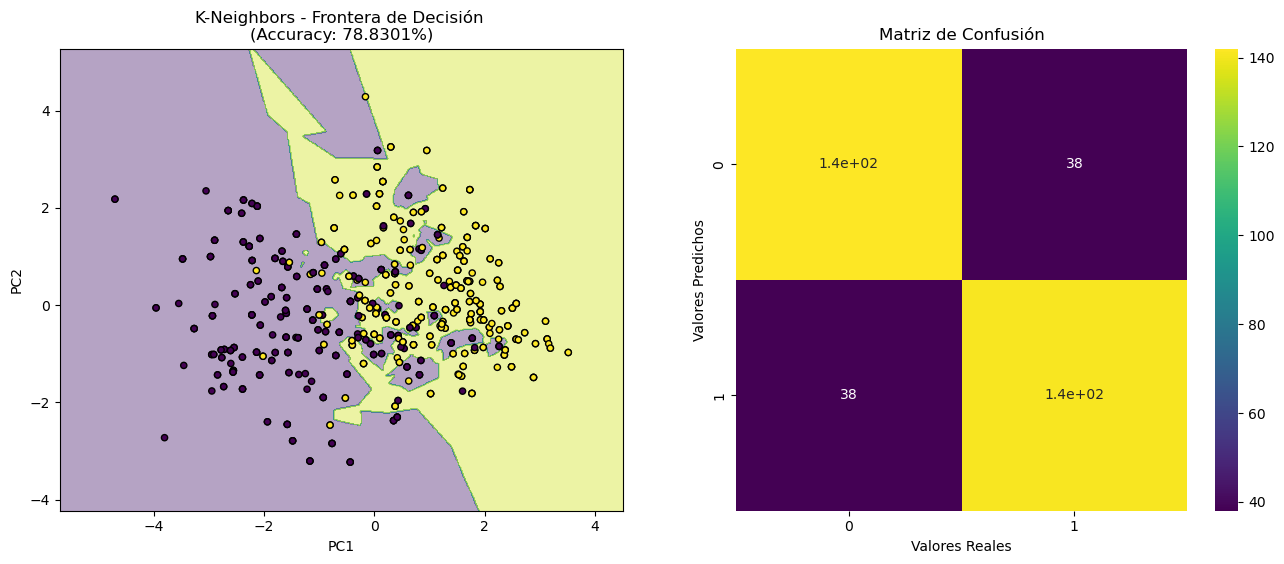

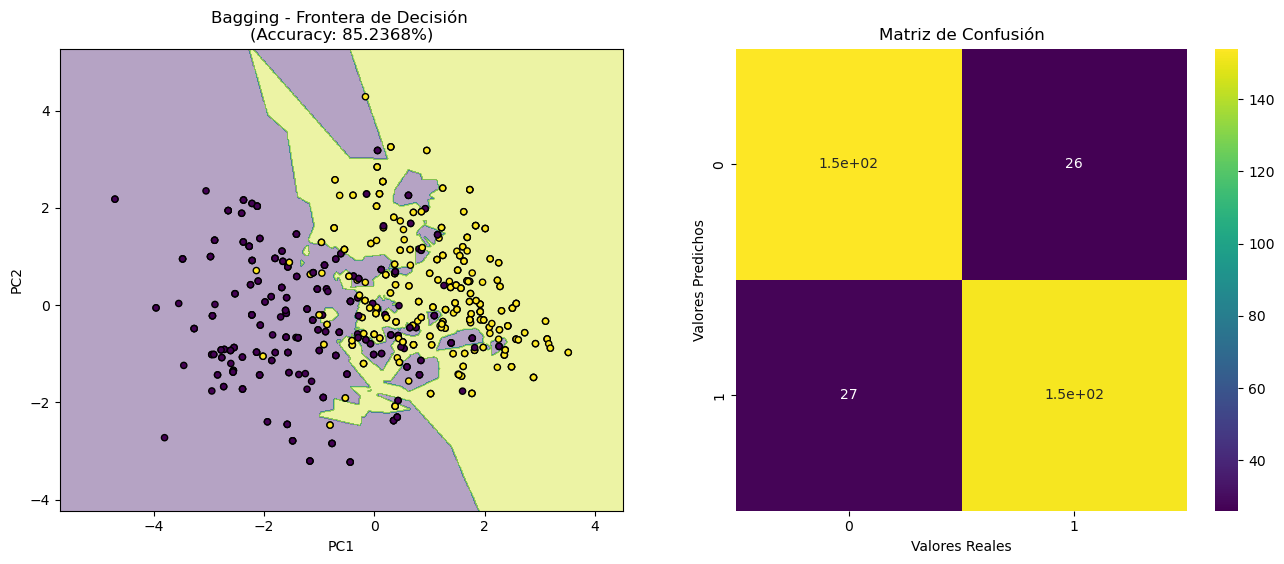

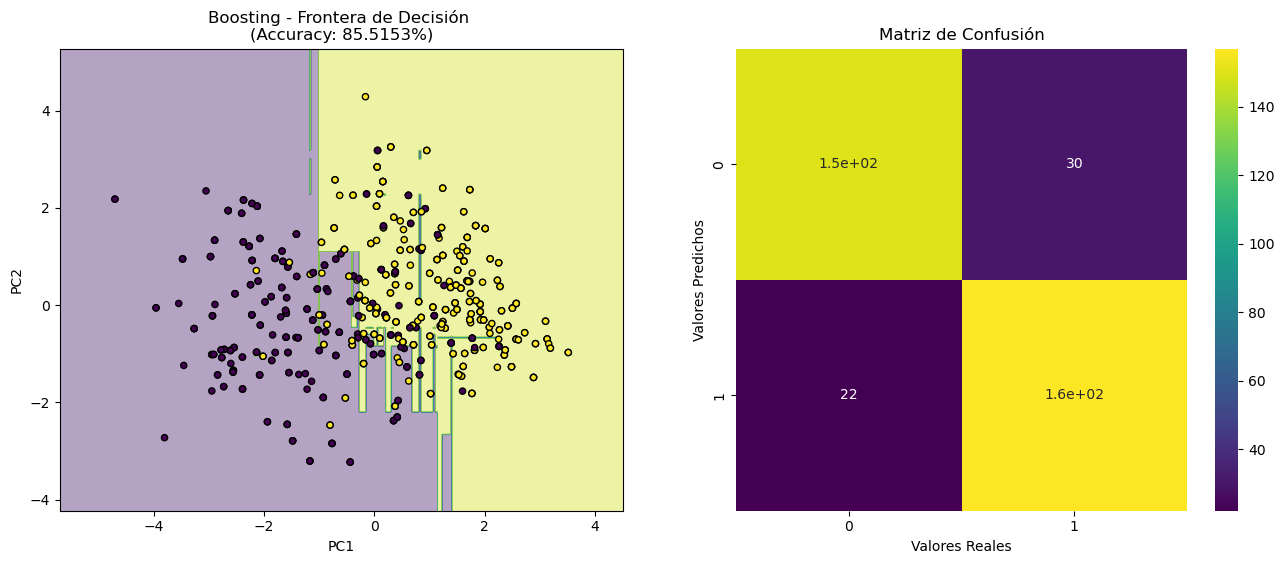

In [15]:
estimators = {
	"K-Neighbors": KNeighborsClassifier(),
	"Bagging": BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=50, random_state=42),
	"Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
}


for name, estimator in estimators.items():
  estimator.fit(X_train_pca, y_train)
  prediction = estimator.predict(X_test_pca)
  accuracy = accuracy_score(y_test, prediction)
  cm = confusion_matrix(y_test, prediction)
  
  plot_decision_boundary_CM(estimator, X_train_pca, y_train, cm, F"{name} - Frontera de Decisión \n(Accuracy: {accuracy:.4%})")